# Задание 5

Седых Иван Дмитриевич БПМ181

In [1]:
import math

import numpy as np
from matplotlib import pyplot as plt
import tqdm


np.set_printoptions(suppress=True)
plt.style.use('ggplot')

---
## Task 1

$1 + \cos x = 0$  

$$
x_{k+1} = x_k +\frac{\cos x_k + 1}{\sin x_k}
$$

3.141573869728747

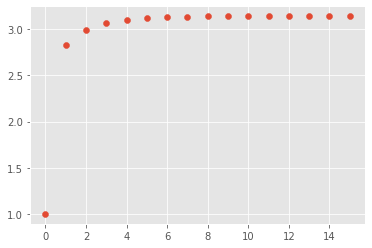

In [117]:
x = 1

history = [x]
max_iter = 15
for i in range(max_iter):
    x = x + (math.cos(x) + 1) / math.sin(x)
    history.append(x)
plt.scatter(range(len(history)), history);
x

$x^2 = 2$
$$
x_{k+1} =\frac 1 2 \left(x_k +\frac{2}{x_k} \right)
$$


1.414213562373095

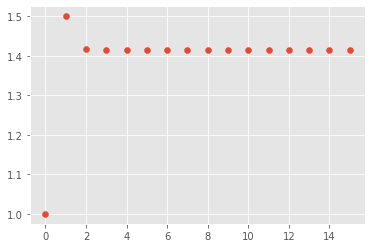

In [23]:
x = 1

history = [x]
max_iter = 15
for i in range(max_iter):
    x = 0.5 * (x + 2 / x)
    history.append(x)
plt.scatter(range(len(history)), history);
x

---
## Task 2

Хотим найти
$$
Ax = b
$$
решение
$$
A = D + (A − D)
$$
$x_{n+1} = Bx_n + c$, где $B = D^{−1}(D − A).$


Понятно, что $c = D^{−1}b$

In [109]:
rnd = np.random.RandomState(1234)
n = 10
A = rnd.uniform(size=(n, n)) + np.diag([15]*n)
b = rnd.uniform(size=n)

d = np.diag(A)
D = np.diag(d)
A_no_diag = A - D
B = - np.linalg.inv(D) @ A_no_diag
print(f'||B|| = {np.linalg.norm(B)}')

c = np.linalg.inv(D) @ b
x = np.random.random(n)

num_iter = 20
for i in range(num_iter):
    x = B @ x + c
    if np.allclose(A@x, b):
        print(f'finished in {i} iterations')
        break

assert np.allclose(A@x, b)

||B|| = 0.36436161983015336
finished in 14 iterations


In [116]:
rnd = np.random.RandomState (1234)
n = 10
A = rnd.uniform(size=(n, n)) + np.diag([5]*n)
b = rnd.uniform(size=n)
d = np.diag(A)
D = np.diag(d)
A_no_diag = A - D
B = - np.linalg.inv(D) @ A_no_diag
print(f'||B|| = {np.linalg.norm(B)}')

c = np.linalg.inv(D) @ b
x = np.random.random(n)

num_iter = 1000
for i in range(num_iter):
    x = B @ x + c
    if np.allclose(A@x, b):
        print(f'finished in {i} iterations')
        break

assert np.allclose(A@x, b)

||B|| = 1.0355299928250665
finished in 98 iterations


Видим, что норма матрицы уменьшилась, а количесвто итераци выросло

---
## Task 3

---
## Task 4 (Бассейн Ньютона)

Итерация ньютона:
$$
z_n = z_{n-1} - \frac{f(z)}{f'(z)}
$$

В нашем случае:
$f(z) = z^3 - 1$,
$f'(z) = 3z^2$
$$
z_{n+1} = z_n - \frac{z_n^3 - 1}{3z^2}
$$

In [2]:
def complex_mash(limit=1, n_points=100):
    """ create square complex mesh
    """
    reals = np.linspace(-limit, limit, n_points)
    imgs = np.linspace(-limit, limit, n_points)
    z_real, z_img = np.meshgrid(reals, imgs)
    z = z_real + 1j*z_img
    return z

def newton_iter(z_0, num_iter=10):
    z = z_0
    for i in range(num_iter):
        z = z - (z**3 - 1) / (3 * z**2)
    return z
    
vector_newton_iter = np.vectorize(newton_iter, excluded=['num_iter'])

@np.vectorize
def get_color(z):
    """determine the color based on closest root
    """
    k = np.arange(3)
    roots = np.exp(k * (2 * np.pi) * 1j / 3)
    c = np.argmin(np.abs(z - roots))
    return c

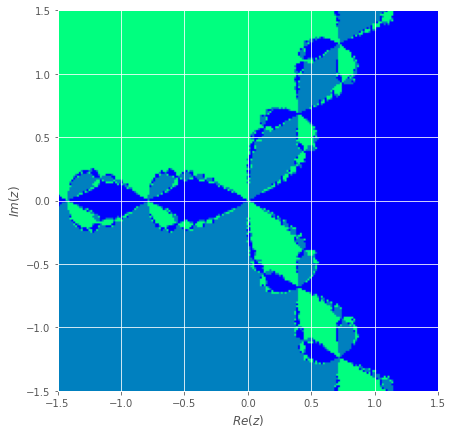

In [37]:
limit = 1.5
z = complex_mash(limit=limit, n_points=200)
res = vector_newton_iter(z)
colors = get_color(res)

plt.figure(figsize=(7, 7))
plt.imshow(colors, extent=[-limit, limit, -limit, limit], cmap='winter');
plt.xlabel("$Re(z)$");
plt.ylabel("$Im(z)$");